In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data#
df = pd.read_excel('/Users/bhagyashrikadam/Documents/NEU_ASSIGNMENTS/ALY6020/Module3/marketing_campaign.xlsx')

In [3]:
df.shape

(2240, 29)

In [4]:
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [5]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [6]:
## PART1 ##

## Data Cleaning ##

# Checking the number of missing values ##
missing_values = df.isnull().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


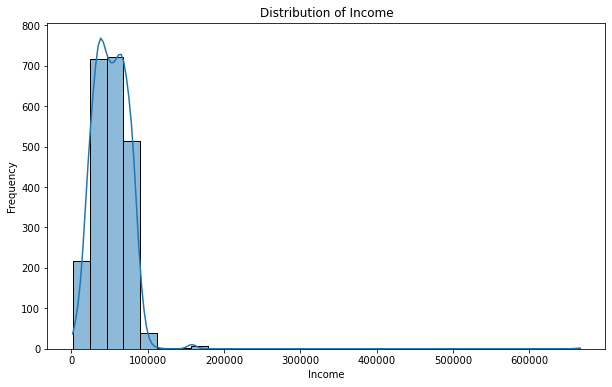

In [7]:
# Visualizing the distribution of the 'Income' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Imputing missing values in 'Income' with its median
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Check again for missing values
missing_values_updated = df.isnull().sum()
print(missing_values_updated)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [ ]:
# Visualizing numeric columns to identify potential outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Removing outliers using the IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the original and the new dataframe after removing outliers
original_shape = df.shape
new_shape = df_no_outliers.shape
original_shape, new_shape



In [ ]:
# Visualizing numeric columns of the cleaned dataset (after removing outliers) using box plots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(y=df_no_outliers[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [9]:
# Convert 'Dt_Customer' column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate the number of days since the earliest date in the dataset
earliest_date = df['Dt_Customer'].min()
df['Days_Since_Customer'] = (df['Dt_Customer'] - earliest_date).dt.days

In [10]:
# Drop the original 'Dt_Customer' column
df = df.drop(['Dt_Customer'], axis=1)


In [11]:
# Checking data types of each column
data_types = df.dtypes
data_types


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Days_Since_Customer      int64
dtype: object

In [12]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [13]:
# Descriptive Statistics #

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Since_Customer
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,345.417857
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,202.122512
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,170.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,343.500000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,518.250000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,699.000000


In [14]:
#PART2 : Building the Logistic regression Model #

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 1. Data Preparation

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Splitting data into training and testing sets ('Response' is the target variable)
X = df_encoded.drop(['ID', 'Response'], axis=1)
y = df_encoded['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1568, 36), (672, 36), (1568,), (672,))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 2. Model Building

# Initialize the logistic regression model
logreg = LogisticRegression(solver="liblinear", max_iter=1000, random_state=42)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)


In [17]:
# 3. Model Evaluation

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8720238095238095

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       577
           1       0.63      0.23      0.34        95

    accuracy                           0.87       672
   macro avg       0.76      0.60      0.63       672
weighted avg       0.85      0.87      0.85       672



In [18]:
# 4. Analyze Coefficients

# Display coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nCoefficients:\n", coefficients)


Coefficients:
                     Feature  Coefficient
16             AcceptedCmp3     0.151958
19             AcceptedCmp1     0.146853
18             AcceptedCmp5     0.145273
15        NumWebVisitsMonth     0.118292
32    Marital_Status_Single     0.102822
17             AcceptedCmp4     0.087622
28            Education_PhD     0.071462
13      NumCatalogPurchases     0.059966
12          NumWebPurchases     0.059583
2                   Kidhome     0.036418
30  Marital_Status_Divorced     0.035872
20             AcceptedCmp2     0.033868
34     Marital_Status_Widow     0.023487
27         Education_Master     0.006128
29     Marital_Status_Alone     0.003380
10             MntGoldProds     0.003277
6                 MntFruits     0.002395
7           MntMeatProducts     0.001807
5                  MntWines     0.001586
9          MntSweetProducts     0.001574
35      Marital_Status_YOLO     0.001254
1                    Income    -0.000002
0                Year_Birth    -0.000477


In [19]:
## Extra code logit model ##

import statsmodels.api as sm

# Adding a constant to the independent variables
X_with_const = sm.add_constant(X_train)

# Fitting the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit()

# Displaying the summary which includes coefficients and p-values
print(result.summary())

# If you want to extract the coefficients and p-values to a DataFrame:
summary_df = pd.DataFrame({
    'Feature': X_with_const.columns,
    'Coefficient': result.params,
    'P-value': result.pvalues
}).sort_values(by='Coefficient', ascending=False)

print("\nCoefficients and P-values:\n", summary_df)


Optimization terminated successfully.
         Current function value: 0.243658
         Iterations 25
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1568
Model:                          Logit   Df Residuals:                     1533
Method:                           MLE   Df Model:                           34
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.4292
Time:                        15:25:11   Log-Likelihood:                -382.06
converged:                       True   LL-Null:                       -669.36
Covariance Type:            nonrobust   LLR p-value:                 1.827e-99
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year_Birth                 -0.0122      0.009     -1.395      0.163      -0.029  

In [20]:
# Part3 : SVM Model #

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", classification_rep_svm)


Accuracy: 0.8586309523809523

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       577
           1       0.50      0.17      0.25        95

    accuracy                           0.86       672
   macro avg       0.69      0.57      0.59       672
weighted avg       0.82      0.86      0.83       672



In [21]:
# Extracting the coefficients

coefficients_svm = svm_model.coef_[0]

# Creating a DataFrame to display the coefficients alongside feature names
svm_coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients_svm
}).sort_values(by='Coefficient', ascending=False)

print(svm_coefficients_df)


                    Feature   Coefficient
18             AcceptedCmp5  4.301555e+01
19             AcceptedCmp1  4.254017e+01
12          NumWebPurchases  4.025892e+01
32    Marital_Status_Single  3.019801e+01
16             AcceptedCmp3  2.653551e+01
17             AcceptedCmp4  2.627478e+01
15        NumWebVisitsMonth  1.966335e+01
2                   Kidhome  1.732258e+01
28            Education_PhD  1.640905e+01
30  Marital_Status_Divorced  1.100000e+01
20             AcceptedCmp2  7.339581e+00
34     Marital_Status_Widow  6.798171e+00
10             MntGoldProds  5.565530e+00
6                 MntFruits  4.416000e+00
7           MntMeatProducts  4.388241e+00
5                  MntWines  3.840877e+00
8           MntFishProducts  3.389319e+00
26     Education_Graduation  1.686229e+00
35      Marital_Status_YOLO  1.000000e+00
23                Z_Revenue  2.458478e-11
22            Z_CostContact  6.906475e-12
29     Marital_Status_Alone  0.000000e+00
21                 Complain  0.000